In [ ]:
# ****-------Notebook Summary----***

#Data Science, Machine Learning,Deep Learning(Artificial Neural Networks(ANN))

#Data Visualization,EDA Analysis, Data Pre-processing,Data Manipulation,Data Cleaning
#--------------------------------------------------------

##(UnSupervised Machine Learning Algorithm)

#Part1=K-means Clustering or Partition clustering

#Part2=Hierarchical Clustering or Agglomerative clustering.

#Part3 =K-means Clustering or Partition clustering for Multiple Cluster

#---------------
#https://www.kaggle.com/sohelranaccselab/market-customer-segmentation-using-unsupervised-ml?scriptVersionId=42067101

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [2]:
#Data Read, Data Visualization,EDA Analysis,Data Pre-Processing,Data Splitting

In [3]:
#Data Read
file_path = '../input/customer-segmentation-tutorial-in-python'
df=pd.read_csv(f'{file_path}/Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
le = LabelEncoder()
for col in df.select_dtypes('object').columns:
    df[col] = le.fit_transform(df[col])

In [7]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [8]:
df = df.loc[:,~df.columns.duplicated()]

In [9]:
import pandas_profiling

In [10]:
# preparing profile report

profile_report = pandas_profiling.ProfileReport(df,minimal=True)
profile_report

/opt/conda/lib/python3.7/site-packages/IPython/core/display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [12]:
df.shape

(200, 5)

In [13]:
df.apply(lambda x: sum(x.isnull()),axis=0)

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [14]:
df.groupby("Gender").mean()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,,
0,97.562500,38.098214,59.250000,51.526786
1,104.238636,39.806818,62.227273,48.511364


In [15]:
df.groupby("Age").mean()

,CustomerID,Gender,Annual Income (k$),Spending Score (1-100)
Age,,,,
18,76.750000,0.750000,51.250000,60.000000
19,97.000000,0.750000,57.000000,39.750000
20,59.200000,0.600000,41.600000,40.200000
21,52.200000,0.200000,38.800000,66.800000
22,36.666667,0.333333,31.333333,70.000000
23,57.833333,0.000000,41.500000,63.333333
24,49.500000,0.500000,39.250000,71.500000
25,100.000000,0.666667,57.666667,39.666667
26,90.000000,1.000000,58.000000,54.500000


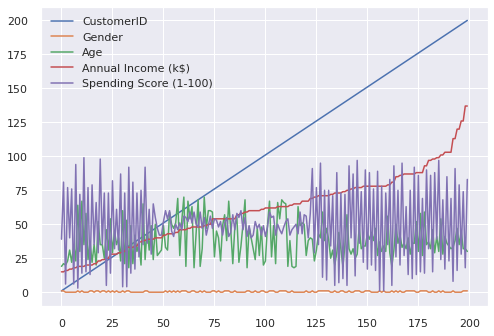

In [16]:
import seaborn; seaborn.set()
df.plot();

In [17]:
df.corr()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,0.057400,-0.026763,0.977548,0.013835
Gender,0.057400,1.000000,0.060867,0.056410,-0.058109
Age,-0.026763,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.058109,-0.327227,0.009903,1.000000


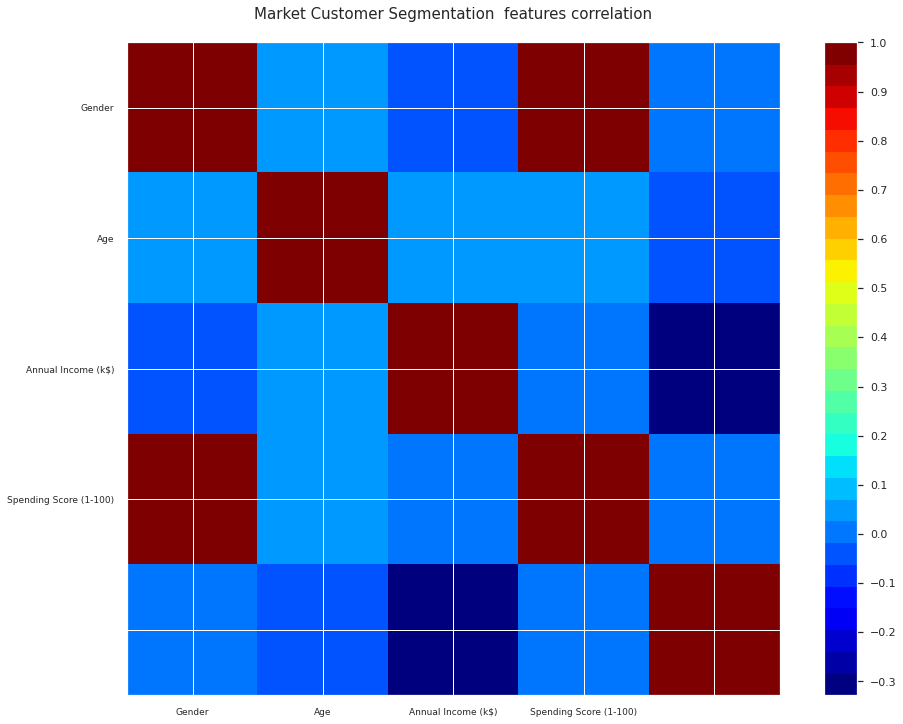

In [18]:
def correlation_matrix(d):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(figsize=(16,12))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Market Customer Segmentation  features correlation\n',fontsize=15)
    labels=df.columns
    ax1.set_xticklabels(labels,fontsize=9)
    ax1.set_yticklabels(labels,fontsize=9)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0.1*i for i in range(-11,11)])
    plt.show()

correlation_matrix(df)

In [19]:
#Plotting data 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

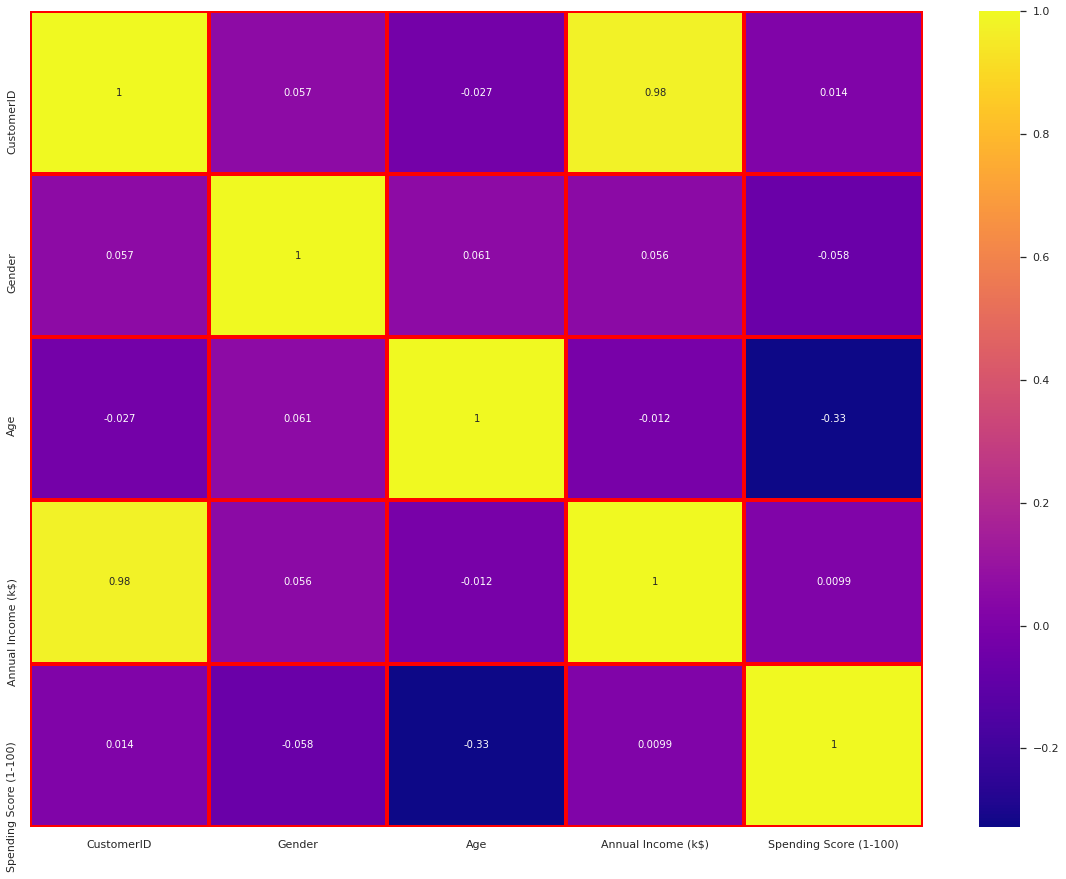

In [20]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,linecolor='red',linewidths=3,cmap = 'plasma')

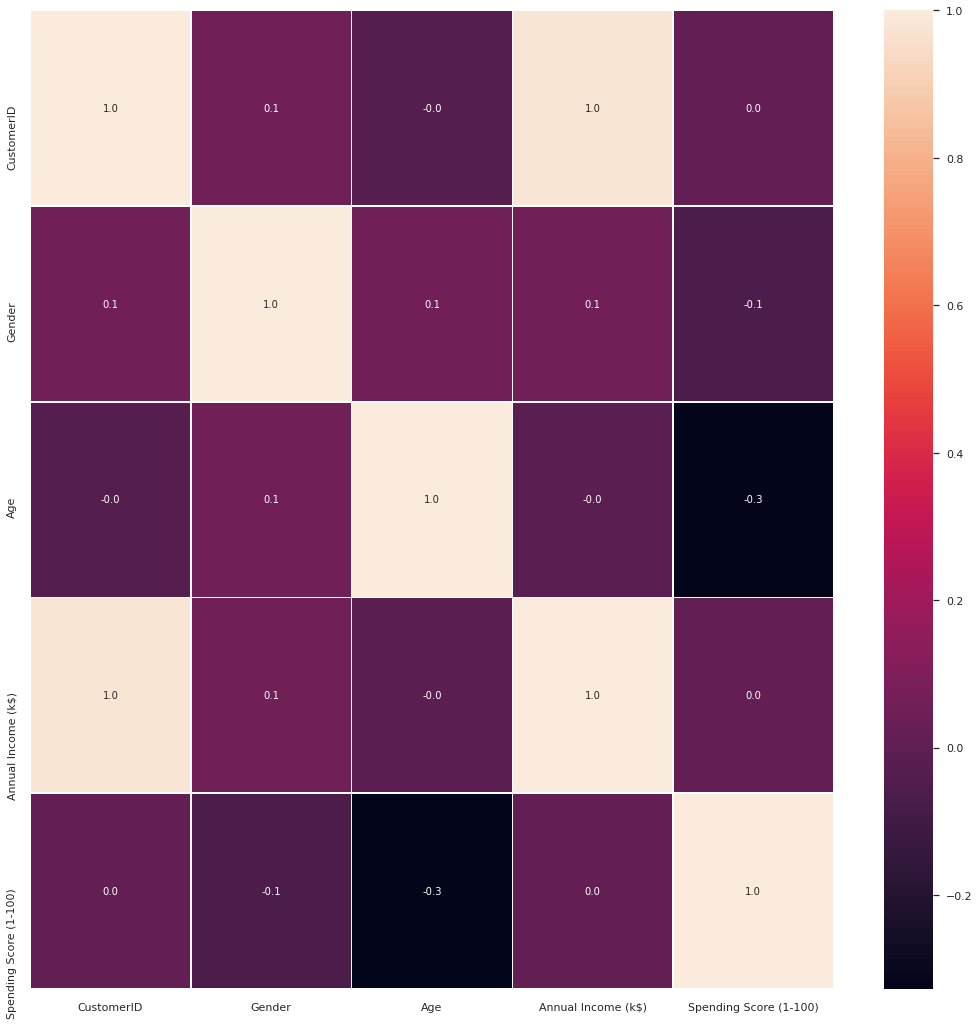

In [21]:
f,ax=plt.subplots(figsize=(18,18))
sns.heatmap(df.corr(),annot=True, linewidths=.5,fmt='.1f',ax=ax)

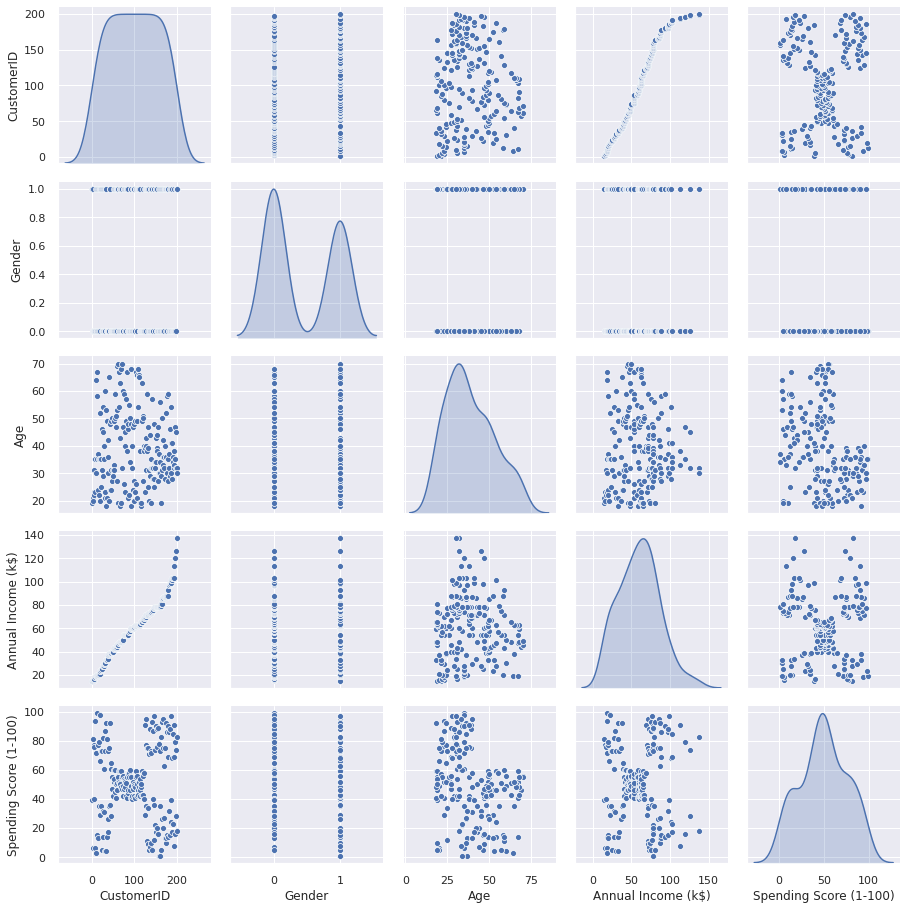

In [22]:
sns.pairplot(df,diag_kind="kde")
plt.show()

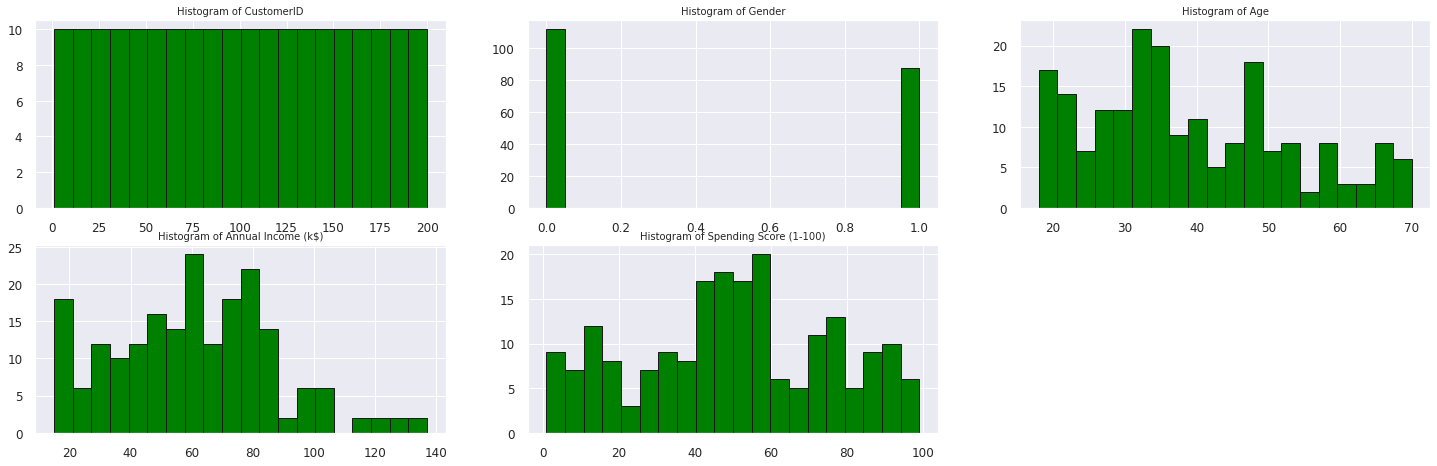

In [23]:
i=1
plt.figure(figsize=(25,20))
for c in df.describe().columns[:]:
    plt.subplot(5,3,i)
    plt.title(f"Histogram of {c}",fontsize=10)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.hist(df[c],bins=20,color='green',edgecolor='k')
    i+=1
plt.show()

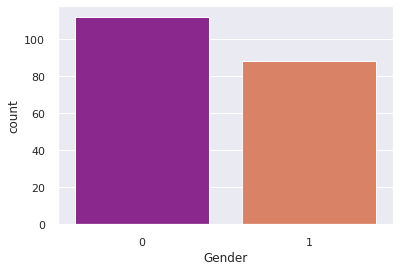

In [24]:
#checking the target variable countplot
sns.countplot(data=df,x = 'Gender',palette='plasma')

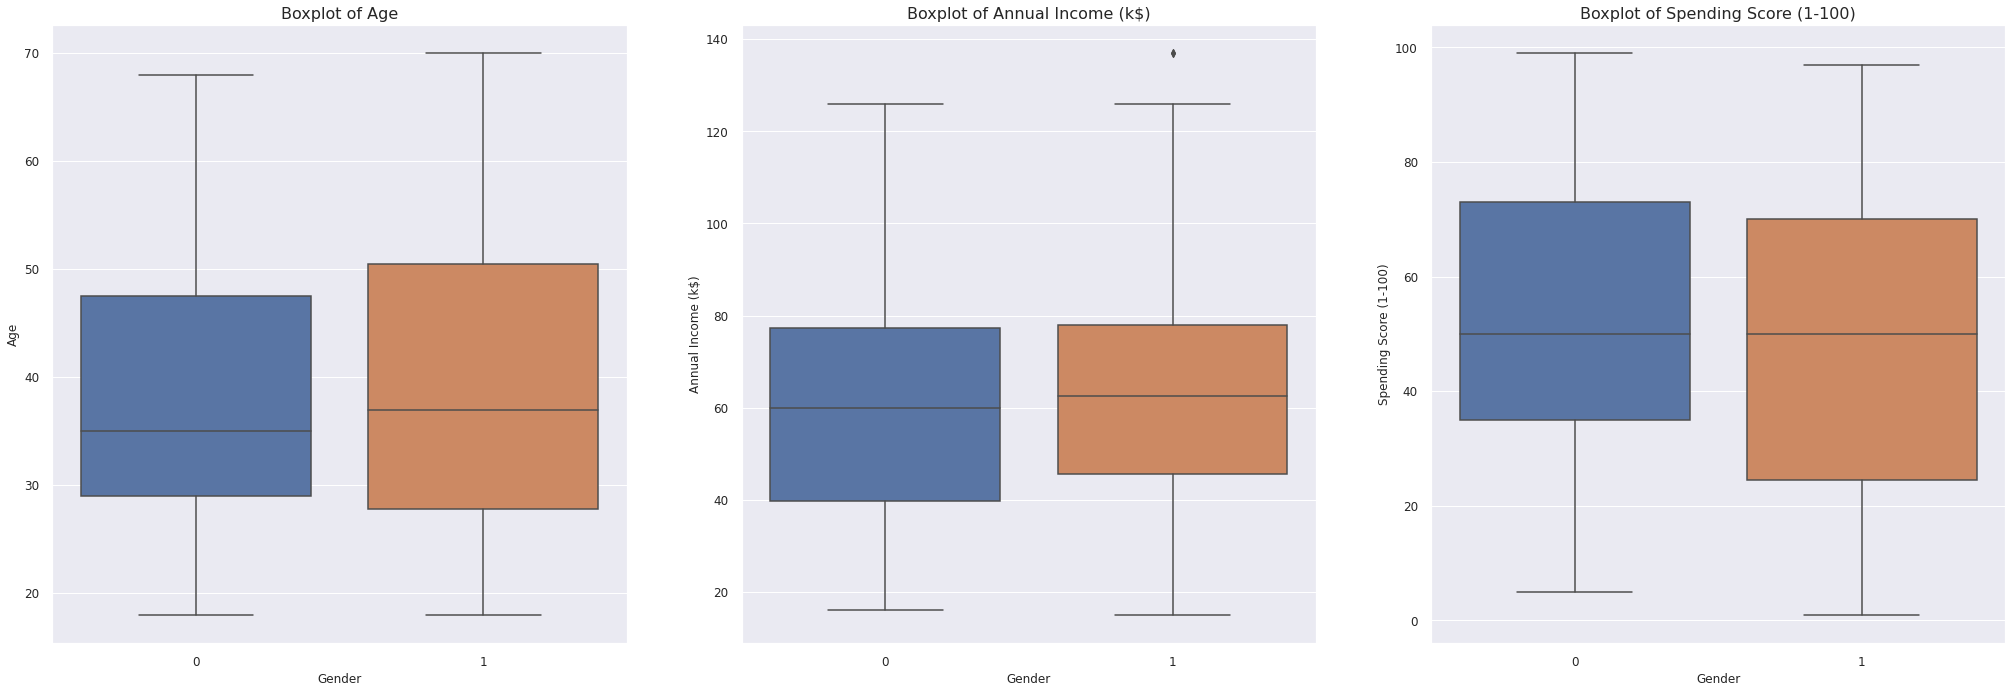

In [25]:
i=1
plt.figure(figsize=(35,25))
for c in df.columns[2:]:
    plt.subplot(2,3,i)
    plt.title(f"Boxplot of {c}",fontsize=16)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    sns.boxplot(y=df[c],x=df['Gender'])
    i+=1
plt.show()

In [26]:
#Numerical Columns data distribution

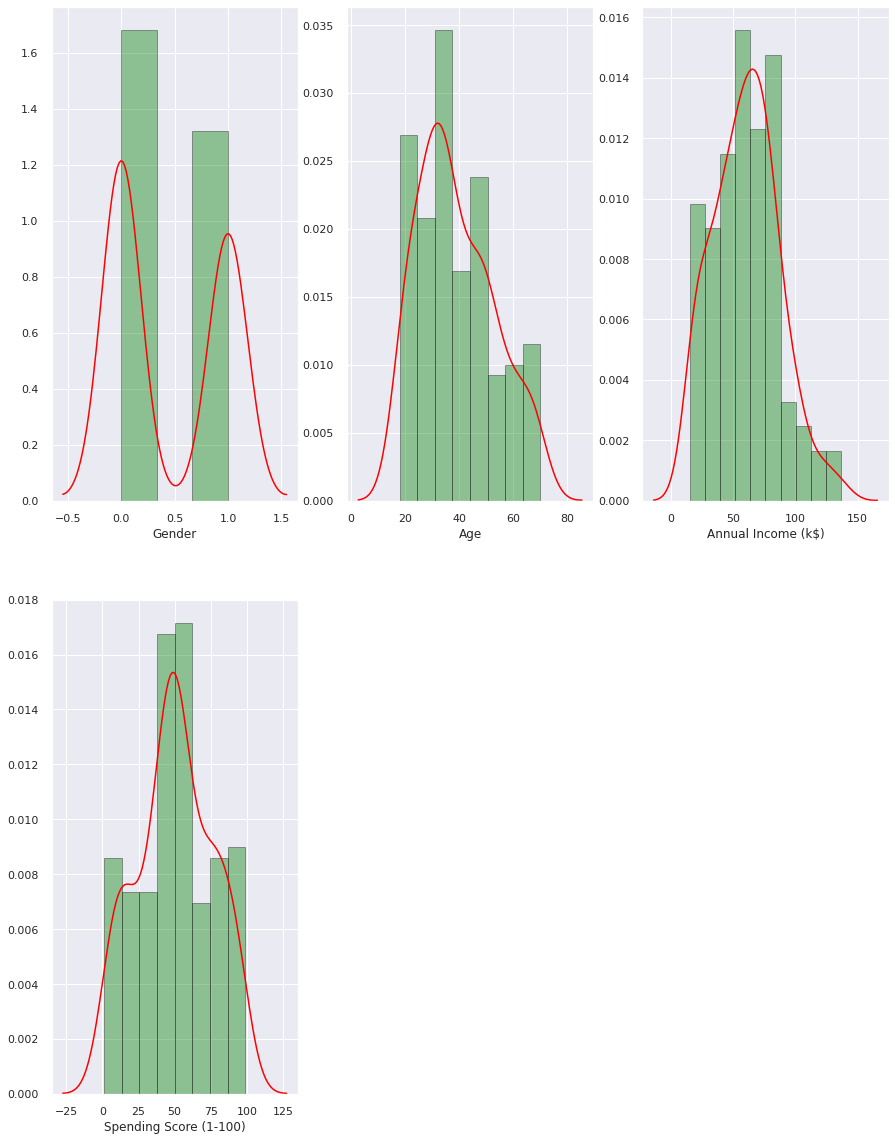

In [27]:
sns.set()
fig = plt.figure(figsize = [15,20])
cols = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
cnt = 1
for col in cols :
    plt.subplot(2,3,cnt)
    sns.distplot(df[col],hist_kws=dict(edgecolor="k", linewidth=1,color='green'),color='red')
    cnt+=1
plt.show() 

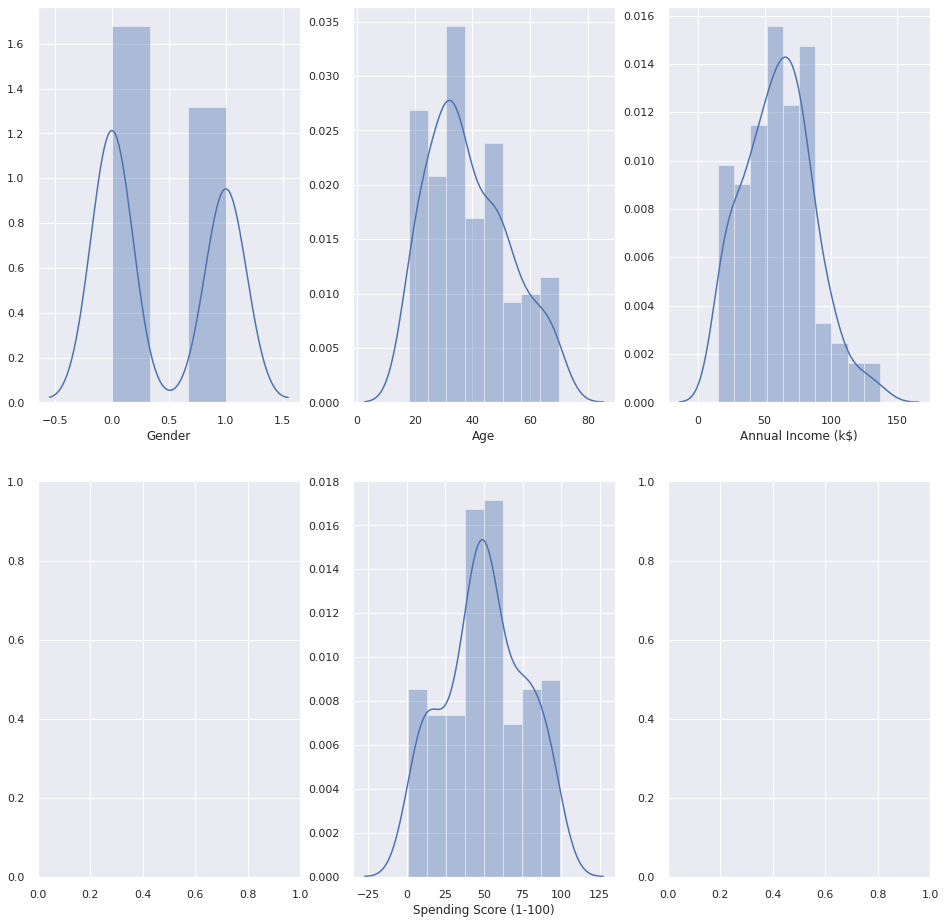

In [28]:
# Distplot
fig, ax2 = plt.subplots(2, 3, figsize=(16, 16))
sns.distplot(df['Gender'],ax=ax2[0][0])
sns.distplot(df['Age'],ax=ax2[0][1])
sns.distplot(df['Annual Income (k$)'],ax=ax2[0][2])
sns.distplot(df['Spending Score (1-100)'],ax=ax2[1][1])


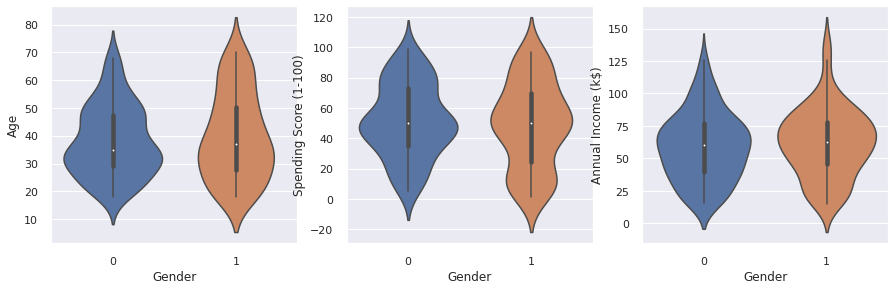

In [29]:
sns.set()
fig = plt.figure(figsize = [15,20])
cols = ['Age', 'Spending Score (1-100)', 'Annual Income (k$)']
cnt = 1
for col in cols :
    plt.subplot(4,3,cnt)
    sns.violinplot(x="Gender", y=col, data=df)
    cnt+=1
plt.show()

In [30]:
#data Pre-Processing:Additinal 

In [31]:
class pre_processing:
    
    def __init__(self, data):
        self.data   = data
    
    def missing_percent_plot(self):
        missing_col = list(self.data.isna().sum() != 0)

        try:
            if True not in missing_col:
                raise ValueError("There is no missing values.")

            self.data = self.data.loc[:,missing_col]
            missing_percent = (self.data.isna().sum()/ self.data.shape[0]) * 100

            df = pd.DataFrame()
            df['Total']        = self.data.isna().sum()
            df['perc_missing'] = missing_percent
            p = sns.barplot(x=df.perc_missing.index, y='perc_missing', data=df); plt.xticks(rotation=90)
            plt.xticks(rotation=45);p.tick_params(labelsize=14)
        except:
            return print('There is no missing values...')
        return df.sort_values(ascending =False, by='Total', axis =0)
    
    def reduce_mem_usage(self, verbose=True):
    
        numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
        start_mem = self.data.memory_usage().sum() / 1024**2 # Memory total(Ram)

        for col in tqdm(self.data.columns):
            col_type = self.data[col].dtypes
            
            if col_type in numerics:
                c_min = self.data[col].min()
                c_max = self.data[col].max()

                # Int
                if str(col_type)[:3] == 'int':
                    if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                        self.data[col] = self.data[col].astype(np.int8)
                    elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                        self.data[col] = self.data[col].astype(np.int16)
                    elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                        self.data[col] = self.data[col].astype(np.int32)
                    elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                        self.data[col] = self.data[col].astype(np.int64)  

                # Float
                else:
                    if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                        self.data[col] = self.data[col].astype(np.float16)
                    elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                        self.data[col] = self.data[col].astype(np.float32)
                    else:
                        self.data[col] = self.data[col].astype(np.float64)

        end_mem = self.data.memory_usage().sum() / 1024**2
        if verbose: 
            print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
        return self.data
    
    def value_symmetry(self, target):
        return self.data[target].value_counts().plot('bar')
    
    def kde_plots(self, columns : list, hue_col : str):
        
        
        for c in columns:
            # hue loop
            for hue_value in self.data[hue_col].unique():
                sns.distplot(self.data[self.data[hue_col] == hue_value][c], hist = False, label=hue_value)
            plt.show()
    
    def plots(self, columns : list, hue_col):
        _, axs = plt.subplots(int(round(len(columns) / 2, 0)), 5,figsize=(12,12))
        
        for n, c in enumerate(columns):
            # hue loop
            for hue_value in self.data[hue_col].unique():
                sns.distplot(self.data[self.data[hue_col] == hue_value][c], hist = False, label=hue_value, ax=axs[n//5][n%5])
            plt.tight_layout()
        plt.show()
            

In [32]:
df1 = pre_processing(df)

In [33]:
columns=['Annual Income (k$)','Spending Score (1-100)', 'Age']
hue_col = 'Gender'

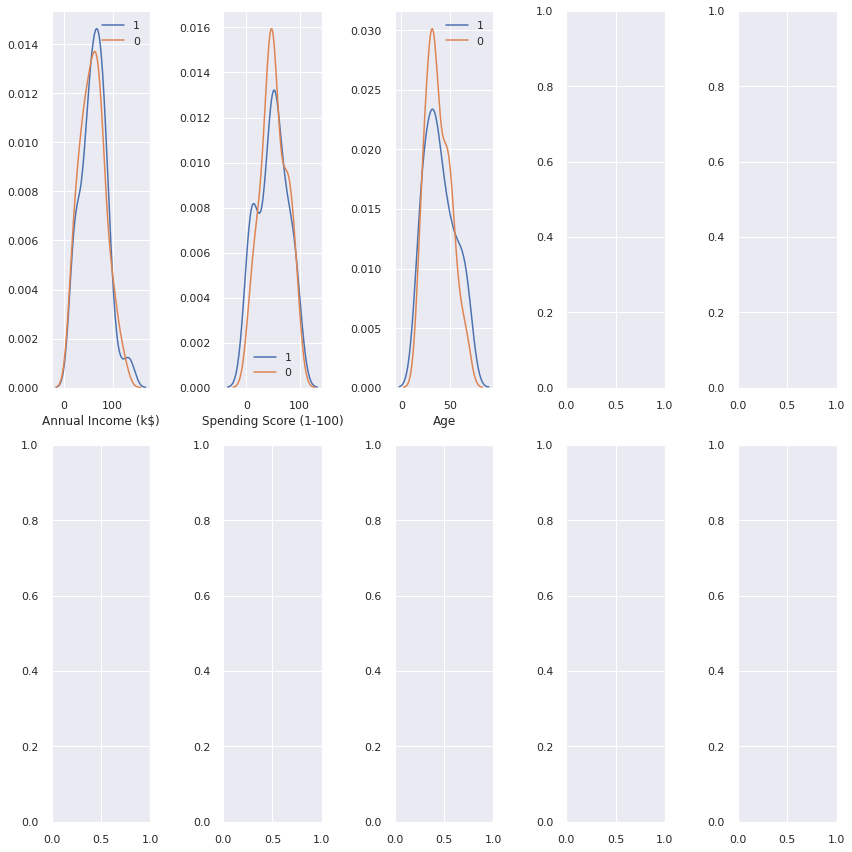

In [34]:
df1.plots(columns, hue_col)

In [35]:
df1.missing_percent_plot()

There is no missing values...


In [36]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [37]:
#Un-Supervised machine Learning Models Performance

In [38]:
origin = df.copy()

In [39]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler

np.random.seed(5)

In [40]:
"""What is clustering?¶
Clustering is an unsupervized learning technique where you take the entire dataset and find the "groups of similar entities" within the dataset. Hence there is no labels within the dataset.

Useful for organizing very large dataset into meaningful clusters that can be useful and actions can be taken upon. For example, take entire customer base of more than 1M records and try to group into high value customers, low value customers and so on.

What questions does clustering typically tend to answer?

Types of pages are there on the Web?
Types of customers are there in my market?
Types of people are there on a Social network?
Types of E-mails in my Inbox?
Types of Genes the human genome has?
From clustering to classification
Clustering is base of all the classification problems. Initially, say we have a large ungrouped number of users in a new social media platform. We know for certain that the number of users will not be equal to the number of groups in the social media, and it will be reasonably finite.
Even though each user can vary in fine-grain, they can be reasonably grouped into clusters.
Each of these grouped clusters become classes when we know what group each of these users fall into.

"""

'What is clustering?¶\nClustering is an unsupervized learning technique where you take the entire dataset and find the "groups of similar entities" within the dataset. Hence there is no labels within the dataset.\n\nUseful for organizing very large dataset into meaningful clusters that can be useful and actions can be taken upon. For example, take entire customer base of more than 1M records and try to group into high value customers, low value customers and so on.\n\nWhat questions does clustering typically tend to answer?\n\nTypes of pages are there on the Web?\nTypes of customers are there in my market?\nTypes of people are there on a Social network?\nTypes of E-mails in my Inbox?\nTypes of Genes the human genome has?\nFrom clustering to classification\nClustering is base of all the classification problems. Initially, say we have a large ungrouped number of users in a new social media platform. We know for certain that the number of users will not be equal to the number of groups in

In [41]:
#Partition clustering

In [42]:
standard_scalar = StandardScaler()
data_scaled = standard_scalar.fit_transform(df)
df = pd.DataFrame(data_scaled, columns=df.columns)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-1.723412,1.128152,-1.424569,-1.738999,-0.434801
1,-1.706091,1.128152,-1.281035,-1.738999,1.195704
2,-1.688771,-0.886405,-1.352802,-1.700830,-1.715913
3,-1.671450,-0.886405,-1.137502,-1.700830,1.040418
4,-1.654129,-0.886405,-0.563369,-1.662660,-0.395980


In [43]:
from sklearn.cluster import KMeans

km = KMeans(init="random", n_clusters=5)
km.fit(df)

KMeans(init='random', n_clusters=5)

In [44]:
km.labels_

array([3, 3, 3, 3, 3, 3, 1, 3, 4, 3, 4, 3, 1, 3, 4, 3, 3, 3, 4, 3, 3, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 4, 3, 4, 3, 1, 3, 1, 3, 1, 3, 1, 3, 4, 3,
       1, 3, 1, 3, 3, 3, 1, 3, 3, 4, 1, 4, 1, 4, 3, 4, 4, 3, 1, 1, 4, 3,
       1, 1, 3, 3, 4, 1, 1, 1, 4, 3, 1, 4, 3, 1, 4, 4, 4, 1, 3, 4, 1, 3,
       1, 1, 1, 3, 4, 1, 1, 3, 1, 3, 4, 3, 3, 1, 4, 3, 4, 3, 1, 4, 4, 4,
       4, 3, 1, 3, 3, 3, 1, 1, 1, 1, 0, 1, 1, 0, 2, 0, 2, 0, 4, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int32)

In [45]:
km.cluster_centers_

array([[ 1.04747082,  0.07050951, -0.45213014,  0.97293875,  1.21414431],
       [-0.4999775 , -0.88640526,  0.76168963, -0.44961726, -0.33159294],
       [ 1.08067278,  0.14809719,  0.07477313,  1.02570541, -1.21752808],
       [-0.87175534, -0.0881844 , -1.00209318, -0.84165752,  0.41268052],
       [-0.52350397,  1.12815215,  1.28276771, -0.47677566, -0.40668932]])

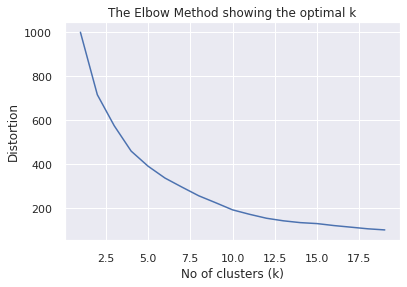

In [46]:
# k-means determine k
distortions = []
K = range(1, 20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)
    
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('No of clusters (k)')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

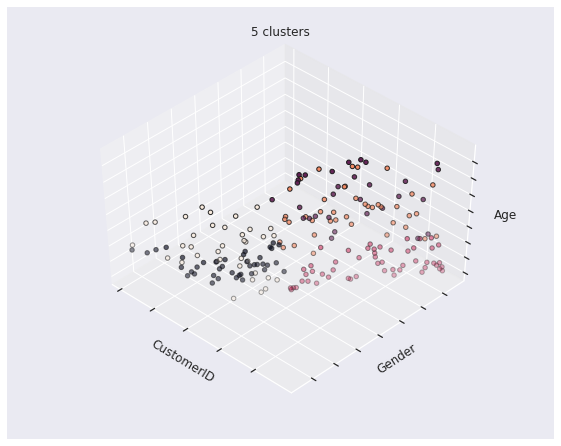

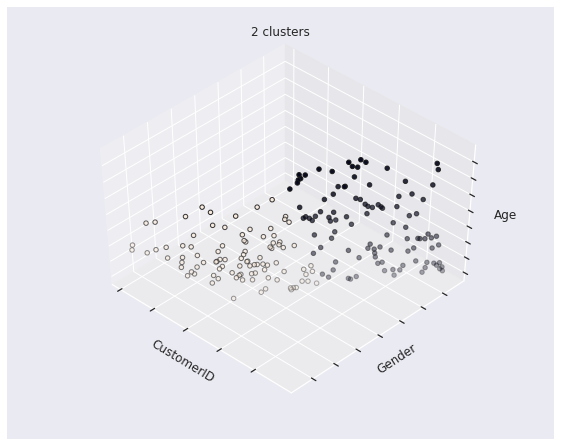

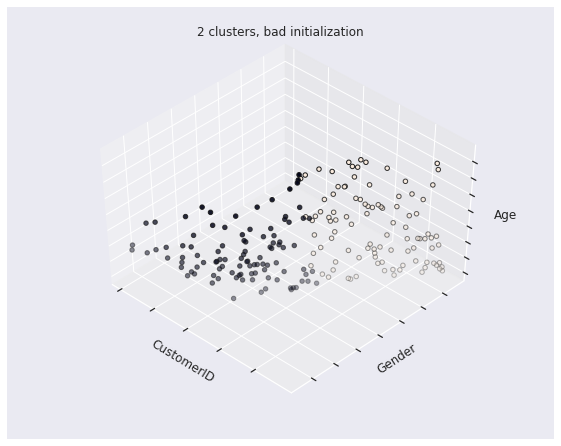

In [47]:
estimators = [('k_means_5', KMeans(n_clusters=5, init='k-means++')),
              ('k_means_2', KMeans(n_clusters=2, init='k-means++')),
              ('k_means_bad_init', KMeans(n_clusters=2, n_init=1, init='random'))]

fignum = 1
titles = ['5 clusters', '2 clusters', '2 clusters, bad initialization']

for name, est in estimators:
    fig = plt.figure(fignum, figsize=(8, 6))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(df)
    labels = est.labels_

    ax.scatter(df.values[:, 3], df.values[:, 0], df.values[:, 2], c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('CustomerID')
    ax.set_ylabel('Gender')
    ax.set_zlabel('Age')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1


In [48]:
#Hierarchical Clustering or Agglomerative clustering.

In [49]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering().fit(df)
clustering

AgglomerativeClustering()

In [50]:
clustering.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

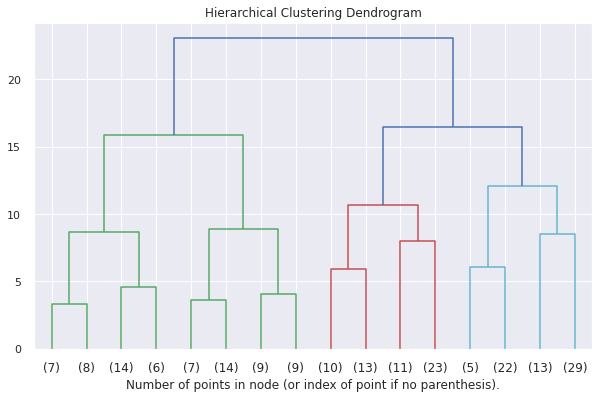

In [51]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(df)

plt.figure(fignum, figsize=(10, 6))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()


In [52]:
#Final Part

In [53]:
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.cluster import KMeans

In [54]:
ss = StandardScaler()
Mall_Customers = pd.DataFrame(ss.fit_transform(df), columns=df.columns)

In [55]:
inertia_list = []
for n_clusters in range(1, 20):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(Mall_Customers)
    inertia_list.append(kmeans.inertia_)

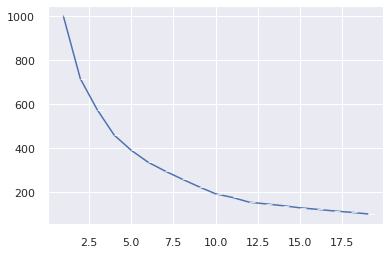

In [56]:
sns.lineplot(x= [i for i in range(1, 20)], y=inertia_list,marker=True)

In [57]:
kmeans = KMeans(n_clusters=4, random_state=42).fit(Mall_Customers)
new_Mall_Customers = pd.concat([pd.DataFrame(kmeans.labels_, columns=['labels']), Mall_Customers], axis=1)

In [58]:
from sklearn.decomposition import PCA

In [59]:
pca=PCA(n_components=4)
pca.fit(Mall_Customers)
pca.explained_variance_ratio_.sum()

0.99553125407001

In [60]:
pca_Mall_Customers = pd.DataFrame(pca.fit_transform(Mall_Customers))

In [61]:
new_Mall_Customers['labels'] = kmeans.labels_
origin['labels']             = kmeans.labels_

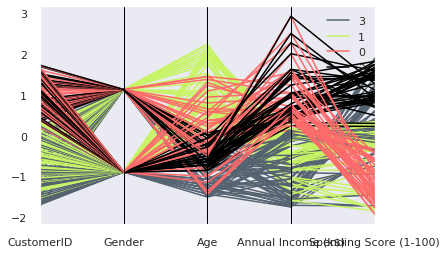

In [62]:
# Multi-dimmention visualization with standardized and pca applied data
pd.plotting.parallel_coordinates(new_Mall_Customers, 'labels', color=('#556270', '#C7F464', '#FF6B6B', '#000000'))

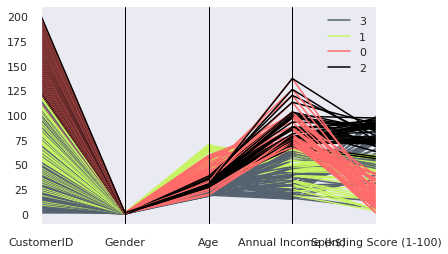

In [63]:
# plot with raw data
pd.plotting.parallel_coordinates(origin, 'labels', color=('#556270', '#C7F464', '#FF6B6B', '#000000'))

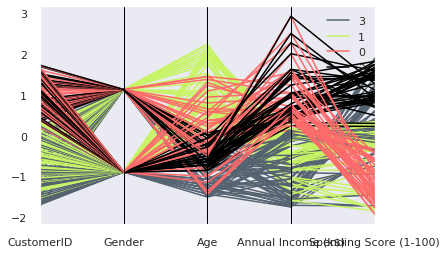

In [64]:
# plot with standardized data
ss_origin = pd.DataFrame(ss.fit_transform(Mall_Customers), columns=Mall_Customers.columns)
ss_origin['labels'] = kmeans.labels_
pd.plotting.parallel_coordinates(ss_origin, 'labels', color=('#556270', '#C7F464', '#FF6B6B', '#000000'))

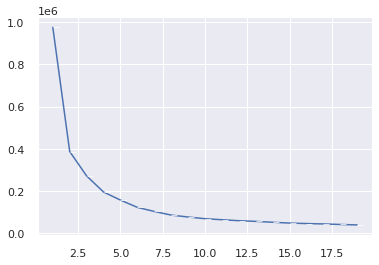

In [65]:
#Lets examine raw data also

inertia_list = []
for n_clusters in range(1, 20):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(origin)
    inertia_list.append(kmeans.inertia_)
# with raw data
sns.lineplot(x= [i for i in range(1, 20)], y=inertia_list,marker=True)

In [66]:
del origin['labels']

In [67]:
kmeans = KMeans(n_clusters=2, random_state=42).fit(origin)
origin['labels'] = kmeans.labels_

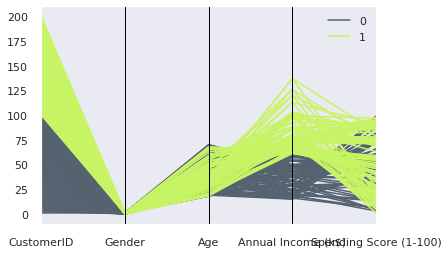

In [68]:
pd.plotting.parallel_coordinates(origin, 'labels', color=('#556270', '#C7F464'))

In [69]:
#Raw data with two clusters looks more clear in Above picture

In [70]:
del origin['labels']

In [71]:
pca=PCA(n_components=3)
pca.fit(origin)
pca.explained_variance_ratio_.sum()

0.9947625055552025

In [72]:
origin_3d_pca = pd.DataFrame(pca.fit_transform(origin))

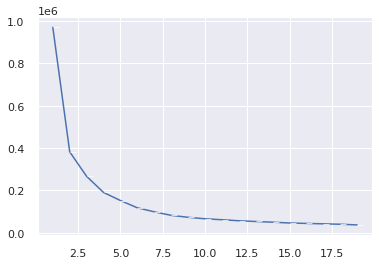

In [73]:
inertia_list = []
for n_clusters in range(1, 20):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(origin_3d_pca)
    inertia_list.append(kmeans.inertia_)
    
# with raw data
sns.lineplot(x= [i for i in range(1, 20)], y=inertia_list,marker=True)

In [74]:
#Let's visualize 3 dimensional scatter plot
kmeans = KMeans(n_clusters=2, random_state=42).fit(origin_3d_pca)
origin_3d_pca['labels'] = kmeans.labels_

In [75]:
Two_clusters_labels = list(kmeans.labels_)

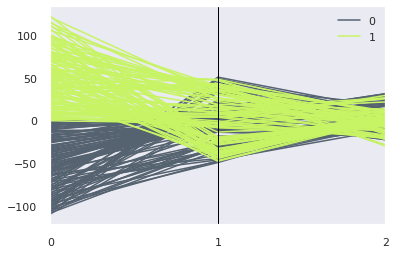

In [76]:
pd.plotting.parallel_coordinates(origin_3d_pca, 'labels', color=('#556270', '#C7F464'))

In [77]:
#3D plotting

In [78]:
origin_3d_pca.rename(index=str, columns={0:'zero', 1:'first', 2:'second'}, inplace=True)
origin_3d_pca.labels[origin_3d_pca.labels == 0] = 'negative' 
origin_3d_pca.labels[origin_3d_pca.labels == 1] = 'positive'

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [79]:
import plotly            as py
from plotly.offline      import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)    #THIS LINE IS MOST IMPORTANT AS THIS WILL DISPLAY PLOT ON 
#NOTEBOOK WHILE KERNEL IS RUNNING


data = []
clusters = []
colors = ['rgb(228,26,28)','rgb(55,126,184)','rgb(77,175,74)']

for i in range(len(origin_3d_pca.labels.unique())):
    name = origin_3d_pca.labels.unique()[i]
    color = colors[i]
    x = origin_3d_pca[ origin_3d_pca['labels'] == name ]['zero']
    y = origin_3d_pca[ origin_3d_pca['labels'] == name ]['first']
    z = origin_3d_pca[ origin_3d_pca['labels'] == name ]['second']
    
    trace = dict(
        name = name,
        x = x, y = y, z = z,
        type = "scatter3d",    
        mode = 'markers',
        marker = dict( size=3, color=color, line=dict(width=0) ) )
    data.append( trace )
    
    cluster = dict(
        color = color,
        opacity = 0.3,
        type = "mesh3d",    
        x = x, y = y, z = z )
    data.append( cluster )

layout = dict(
    width=800,
    height=550,
    autosize=False,
    title='Market Customer Segmentation',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'        
    ),
)

fig = dict(data=data, layout=layout)
iplot(fig)

In [80]:
del origin_3d_pca['labels']

In [81]:
origin_3d_pca.head(n=20)

,zero,first,second
0,-109.383941,5.478454,-22.368045
1,-108.202857,-34.931765,-10.777946
2,-107.376292,37.840872,-28.968556
3,-106.007807,-30.562696,-9.741001
4,-104.980323,7.296747,-10.441851
5,-103.774723,-29.801238,-10.931561
6,-102.996481,41.322770,-14.352263
7,-101.426745,-47.071303,-5.810008
8,-100.952191,50.923738,13.183349
9,-99.380522,-24.034608,-4.044204


In [82]:
kmeans = KMeans(n_clusters=5, random_state=42).fit(origin_3d_pca)
origin_3d_pca['labels'] = kmeans.labels_
Five_clusters_labels = list(kmeans.labels_)

In [83]:
origin_3d_pca.labels[origin_3d_pca.labels == 0] = 'a' 
origin_3d_pca.labels[origin_3d_pca.labels == 1] = 'b'
origin_3d_pca.labels[origin_3d_pca.labels == 2] = 'c' 
origin_3d_pca.labels[origin_3d_pca.labels == 3] = 'd'
origin_3d_pca.labels[origin_3d_pca.labels == 4] = 'e'

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [84]:
data = []
clusters = []
colors = ['rgb(228,26,28)', 'rgb(55,126,184)', 
          'rgb(77,175,74)', 'rgb(0,255,199)', 
          'rgb(0,0,255)']

for i in range(len(origin_3d_pca.labels.unique())):
    name = origin_3d_pca.labels.unique()[i]
    color = colors[i]
    x = origin_3d_pca[ origin_3d_pca['labels'] == name ]['zero']
    y = origin_3d_pca[ origin_3d_pca['labels'] == name ]['first']
    z = origin_3d_pca[ origin_3d_pca['labels'] == name ]['second']
    
    trace = dict(
        name = name,
        x = x, y = y, z = z,
        type = "scatter3d",    
        mode = 'markers',
        marker = dict( size=3, color=color, line=dict(width=0) ) )
    data.append( trace )
    
    cluster = dict(
        color = color,
        opacity = 0.3,
        type = "mesh3d",    
        x = x, y = y, z = z )
    data.append( cluster )

layout = dict(
    width=800,
    height=550,
    autosize=False,
    title='Market Customer Segmentation(Five cluster)',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'        
    ),
)

fig = dict(data=data, layout=layout)
iplot(fig)


In [85]:
Two_clusters  = origin.copy()
Five_clusters = origin.copy()

In [86]:
Two_clusters['labels'] = Two_clusters_labels
Five_clusters['labels'] = Five_clusters_labels

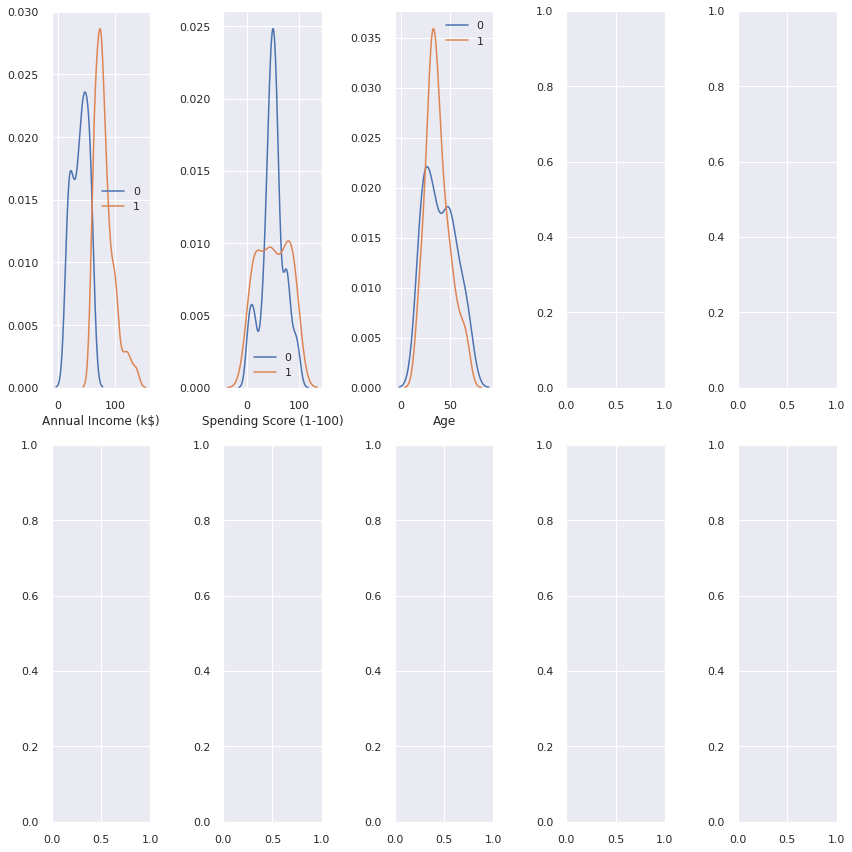

In [87]:
columns=['Annual Income (k$)','Spending Score (1-100)', 'Age']
hue_col = 'labels'

Two_clusters_instance = pre_processing(Two_clusters)
 
Two_clusters_instance.plots(columns, hue_col)

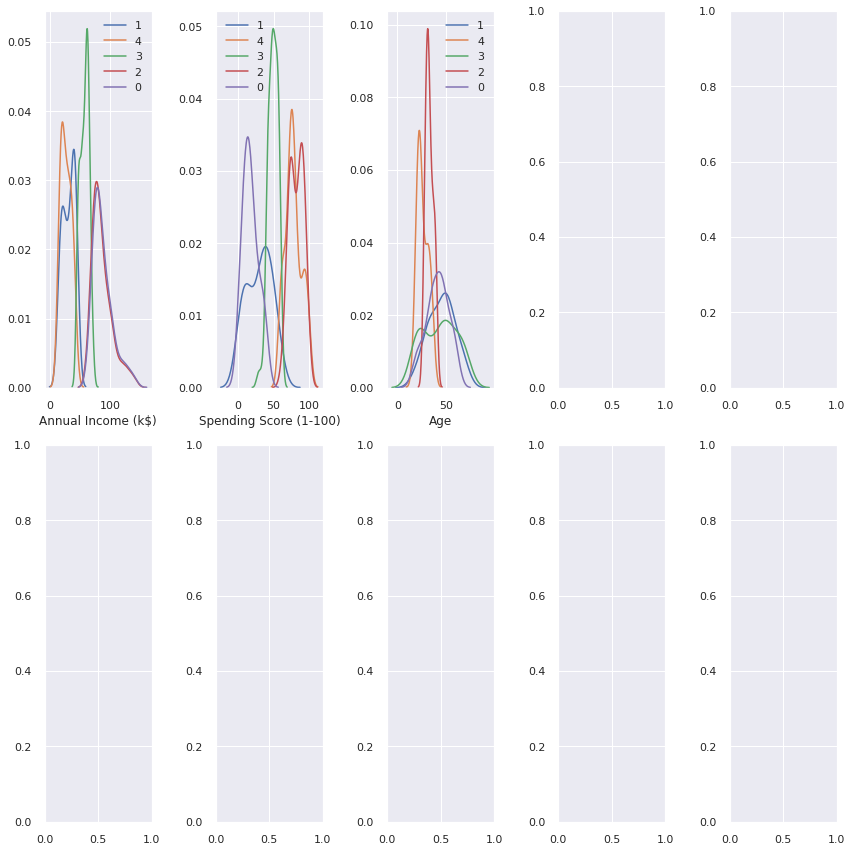

In [88]:
columns=['Annual Income (k$)','Spending Score (1-100)', 'Age']
hue_col = 'labels'

Five_clusters_instance = pre_processing(Five_clusters)
 

Five_clusters_instance.plots(columns, hue_col)

In [89]:
Two_clusters['labels']  = Two_clusters_labels
Five_clusters['labels'] = Five_clusters_labels

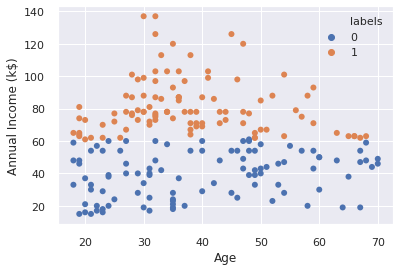

In [90]:
sns.scatterplot(x="Age", y="Annual Income (k$)",
                hue="labels", 
                sizes=(1, 8), linewidth=0,
                data=Two_clusters)

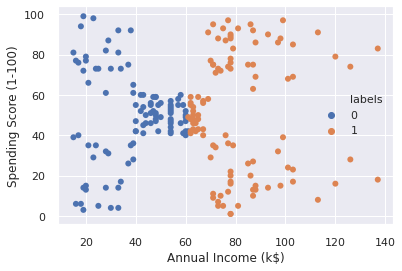

In [91]:
sns.scatterplot(y="Spending Score (1-100)", x="Annual Income (k$)",
                hue="labels", 
                sizes=(1, 8), linewidth=0,
                data=Two_clusters)

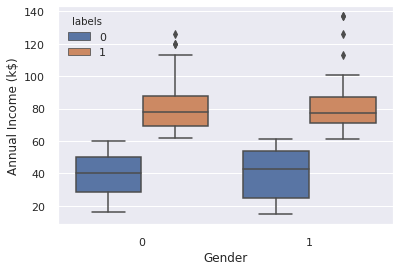

In [92]:
# 'Female', 'Male'
sns.boxplot(x="Gender", y="Annual Income (k$)", hue='labels',data=Two_clusters)

In [93]:
Two_clusters.head(n=20)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),labels
0,1,1,19,15,39,0
1,2,1,21,15,81,0
2,3,0,20,16,6,0
3,4,0,23,16,77,0
4,5,0,31,17,40,0
5,6,0,22,17,76,0
6,7,0,35,18,6,0
7,8,0,23,18,94,0
8,9,1,64,19,3,0
9,10,0,30,19,72,0


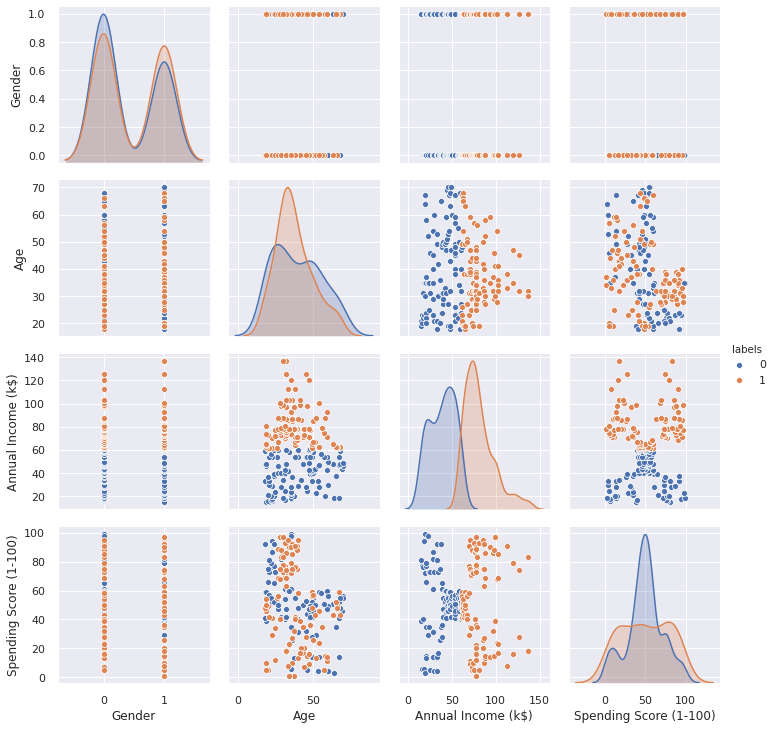

In [94]:
sns.pairplot(Two_clusters.drop(['CustomerID'], axis=1), hue="labels")

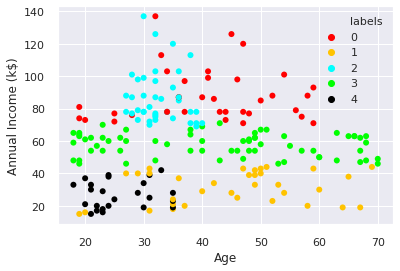

In [95]:
sns.scatterplot(x="Age", y="Annual Income (k$)",
                hue="labels", 
                sizes=(1, 8), linewidth=0,
                palette = ['#ff0000', '#ffc300', '#00ffff', '#00ff00', '#000000'],
                data=Five_clusters)

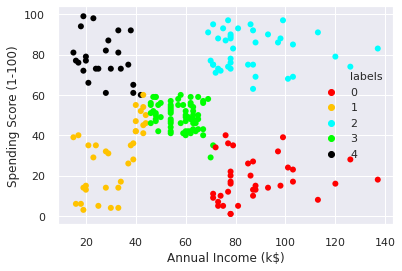

In [96]:
sns.scatterplot(y="Spending Score (1-100)", x="Annual Income (k$)",
                hue="labels", 
                sizes=(1, 8), linewidth=0,
                palette = ['#ff0000', '#ffc300', '#00ffff', '#00ff00', '#000000'],
                data=Five_clusters)

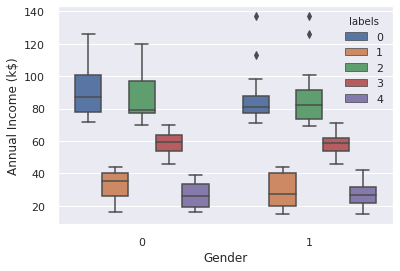

In [97]:
# 'Female', 'Male'
sns.boxplot(x="Gender", y="Annual Income (k$)", hue='labels',data=Five_clusters)

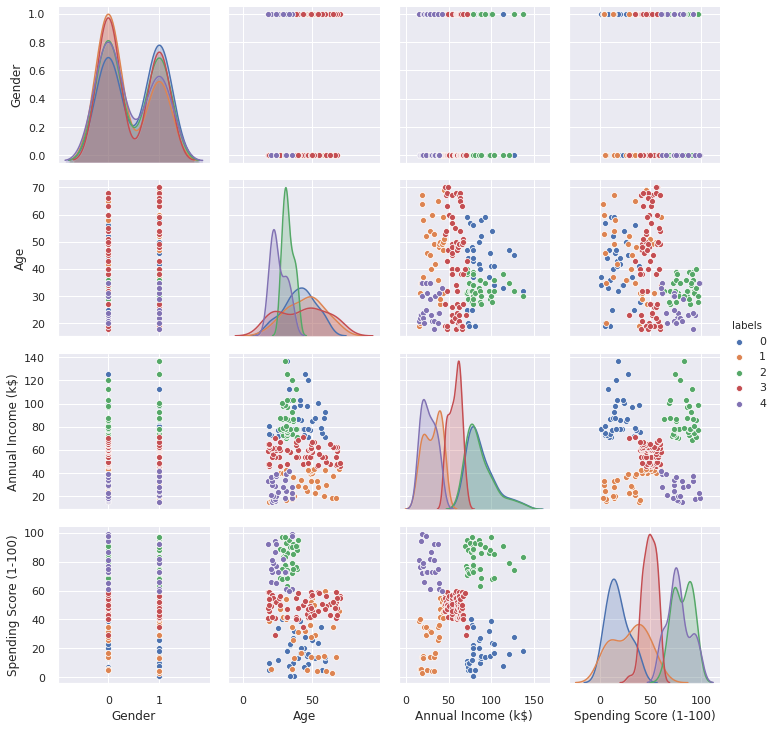

In [98]:
sns.pairplot(Five_clusters.drop(['CustomerID'], axis=1), hue="labels")

In [99]:
""""Final Ans:Spending score indicate, score that market 
    company measured. Basically if you're young, then whatever 
    your state of bank account company measure your spending score higher. 
    However if you're old, then whatever your state of bank account company 
    measure your spending score lower. Finally, if your income is average income, 
    then whatever your age,
    company measure your spending score at middle score.
    
    """

'"Final Ans:Spending score indicate, score that market \n    company measured. Basically if you\'re young, then whatever \n    your state of bank account company measure your spending score higher. \n    However if you\'re old, then whatever your state of bank account company \n    measure your spending score lower. Finally, if your income is average income, \n    then whatever your age,\n    company measure your spending score at middle score.\n    \n    '